In [10]:
# Carga de paquetes necesarios para graficar
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd # Para leer archivos
import geopandas as gpd # Para hacer cosas geográficas
import seaborn as sns # Para hacer plots lindos
import networkx as nx # Construcción de la red en NetworkX
import scipy


# Preambulo

En esta sección cargamos los datos y los visualizamos. También construimos la matriz de adyacencia de la red de museos.

## Carga de datos de los museos

El listado de los museos, con el que se construye el [mapa](https://mapas.museosabiertos.org/museos/caba/), lo podemos encontrar [acá](https://github.com/MuseosAbiertos/Leaflet-museums-OpenStreetMap/blob/principal/data/export.geojson?short_path=bc357f3). También descargamos los barrios de CABA como complemento para los gráficos.

In [11]:
# Leemos el archivo, retenemos aquellos museos que están en CABA, y descartamos aquellos que no tienen latitud y longitud
museos = gpd.read_file('https://raw.githubusercontent.com/MuseosAbiertos/Leaflet-museums-OpenStreetMap/refs/heads/principal/data/export.geojson')
barrios = gpd.read_file('https://cdn.buenosaires.gob.ar/datosabiertos/datasets/ministerio-de-educacion/barrios/barrios.geojson')

## Visualización

<Axes: >

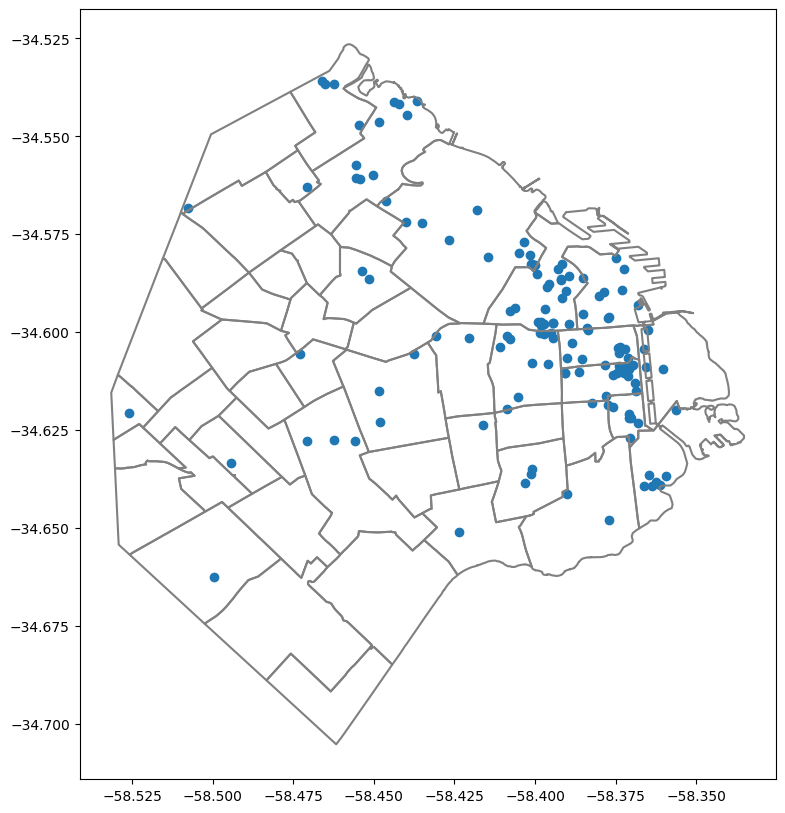

In [12]:
# Armamos el gráfico para visualizar los museos
fig, ax = plt.subplots(figsize=(10, 10))
barrios.boundary.plot(color='gray',ax=ax)
museos.plot(ax=ax)

## Cálculo de la matriz de distancias

Ahora construimos la matriz de distancias entre todos los museos. Como la tierra es un [geoide](https://es.wikipedia.org/wiki/Geoide) (es decir que no es [plana](https://es.wikipedia.org/wiki/Terraplanismo)), el cálculo de distancias no es una operación obvia. Una opción es proyectar a un [sistema de coordenadas local](https://geopandas.org/en/stable/docs/user_guide/projections.html), de forma tal que las distancias euclideas se correspondan con las distancias en metros. En este notebook usamos [EPSG](https://en.wikipedia.org/wiki/EPSG_Geodetic_Parameter_Dataset) 22184.

In [13]:
# En esta línea:
# Tomamos museos, lo convertimos al sistema de coordenadas de interés, extraemos su geometría (los puntos del mapa),
# calculamos sus distancias a los otros puntos de df, redondeamos (obteniendo distancia en metros), y lo convertimos a un array 2D de numpy
D = museos.to_crs("EPSG:22184").geometry.apply(lambda g: museos.to_crs("EPSG:22184").distance(g)).round().to_numpy()

### Matriz de adyacencia: construimos una matriz conectando a cada museo con los $m$ más cercanos

In [14]:
def construye_adyacencia(D,m):
    # Función que construye la matriz de adyacencia del grafo de museos
    # D matriz de distancias, m cantidad de links por nodo
    # Retorna la matriz de adyacencia como un numpy.
    D = D.copy()
    l = [] # Lista para guardar las filas
    for fila in D: # recorriendo las filas, anexamos vectores lógicos
        l.append(fila<=fila[np.argsort(fila)[m]] ) # En realidad, elegimos todos los nodos que estén a una distancia menor o igual a la del m-esimo más cercano
    A = np.asarray(l).astype(int) # Convertimos a entero
    np.fill_diagonal(A,0) # Borramos diagonal para eliminar autolinks
    return(A)

m = 3 # Cantidad de links por nodo
A = construye_adyacencia(D,m)

## Construcción de la red en NetworkX (sólo para las visualizaciones)

In [15]:
G = nx.from_numpy_array(A) # Construimos la red a partir de la matriz de adyacencia
# Construimos un layout a partir de las coordenadas geográficas
G_layout = {i:v for i,v in enumerate(zip(museos.to_crs("EPSG:22184").get_coordinates()['x'],museos.to_crs("EPSG:22184").get_coordinates()['y']))}

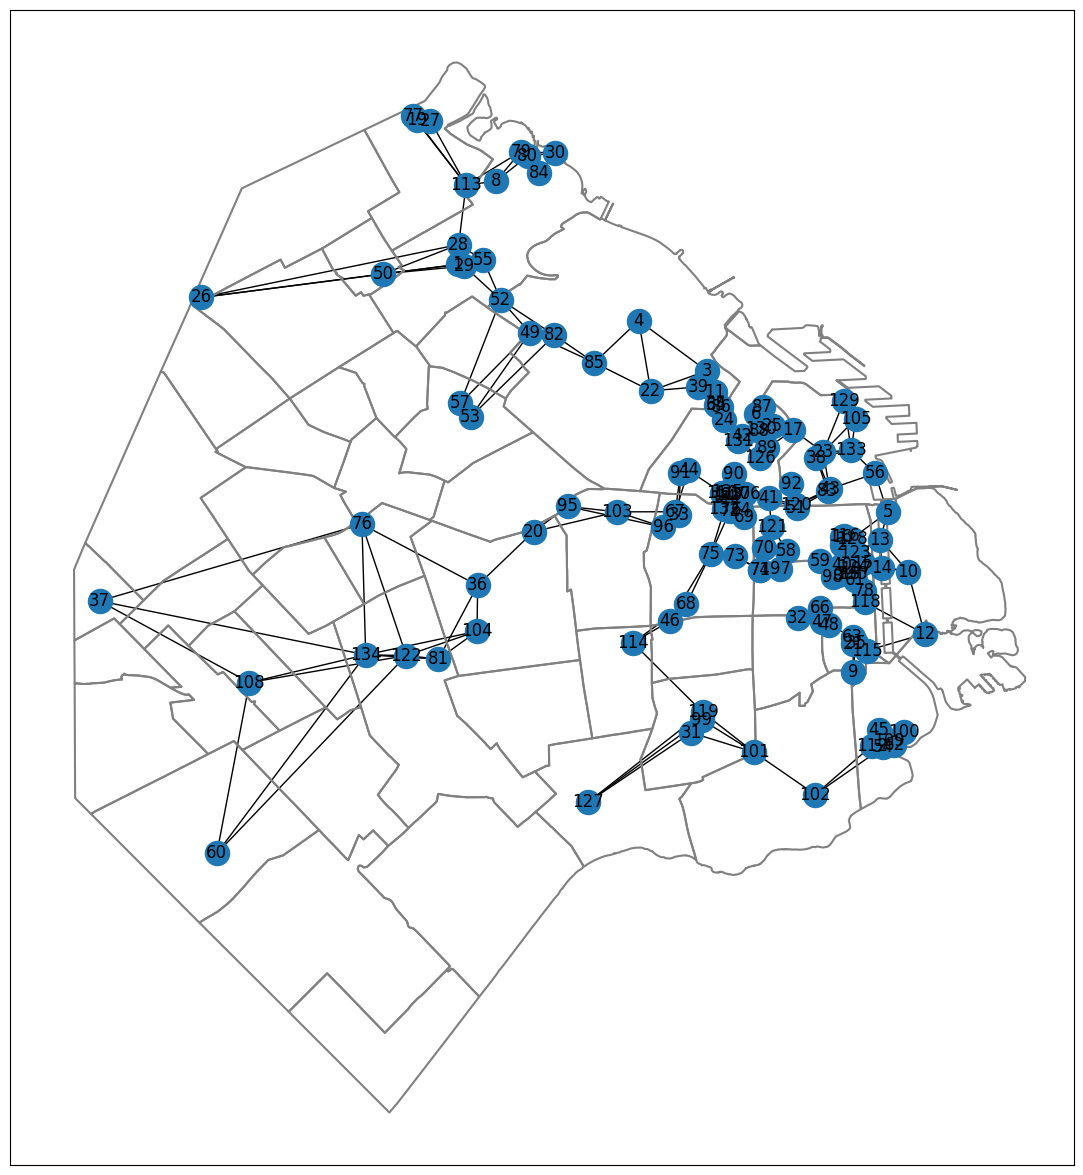

In [16]:
fig, ax = plt.subplots(figsize=(15, 15)) # Visualización de la red en el mapa
barrios.to_crs("EPSG:22184").boundary.plot(color='gray',ax=ax) # Graficamos Los barrios
nx.draw_networkx(G,G_layout,ax=ax) # Graficamos los museos

# Resolución del TP

Aquí empieza la aventura... ¡diviertanse y consulten lo que necesiten!

## Punto 1:

In [17]:
A

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(136, 136))

In [18]:
matriz = np.array([[1, 0,1],
                   [1, 0, 1],
                    [1,1,1]])
#calcular matriz de transiciones


## Punto 2:


## Punto 3:
#M p = b,
# M = N /α (I − (1 − α)C)
# b = 1
L=1/3*np.eye(n) #crea identidad

$$ A = \alpha I $$

como vimos alasdlas


In [19]:
def construye_adyacencia(D, m):
    # Función que construye la matriz de adyacencia del grafo de museos
    # D matriz de distancias, m cantidad de links por nodo
    # Retorna la matriz de adyacencia como un numpy.
    D = D.copy()
    l = []  # Lista para guardar las filas
    for fila in D:  # recorriendo las filas, anexamos vectores lógicos
        m_int = int(m)  # Aseguramos que m sea un entero
        if m_int >= len(fila):  # Validación para evitar índices fuera de rango
            raise ValueError(f"El valor de m ({m_int}) es mayor o igual al número de elementos en la fila ({len(fila)}).")
        l.append(fila <= fila[np.argsort(fila)[m_int]])  # Elegimos nodos a una distancia menor o igual al m-ésimo más cercano
    A = np.asarray(l).astype(int)  # Convertimos a entero
    np.fill_diagonal(A, 0)  # Borramos diagonal para eliminar autolinks
    return A
m = 3 # Cantidad de links por nodo
A = construye_adyacencia(D,m)
A

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(136, 136))

Creamos la funcion para contruir M de acuerdo a los m vecinos más cercanos y el factor alpha de amortiguamiento


In [20]:
def calcula_transicion(A):
  n= A.shape[0]
  #calcular A transpuesta
  A_t = np.transpose(A)
  #calcular K
  diagonal = np.sum(A, axis=1)
  K = np.diag(diagonal)
  #calcular K inversa
  K_inv= np.diag(1/diagonal)
  #multiplicacion y obtener C (transicion)
  C = A_t @ K_inv
  return C

transicion = calcula_transicion(A)


In [21]:
def calcula_M (D, m, alpha):
    #D es la matriz de distancias, m es el numero m vecinos mas cercanos a considerar y alpha el factor de amortiguamiento
    A= construye_adyacencia(D,m)
    n= A.shape[0]
    C = calcula_transicion(A)
    return  n/alpha * ( np.identity(n) - (1-alpha) * C )


In [22]:
def calculaLU(A):
    # matriz es una matriz de NxN
    # Retorna la factorización LU a través de una lista con dos matrices L y U de NxN.
    # Completar! Have fun
    m=A.shape[0]#fila
    n=A.shape[1]
    Ac = A.copy()#U
    #L=np.eye(n)
    if m!=n:
        print('Matriz no cuadrada')
        return

    ## desde aqui -- CODIGO A COMPLETAR
    print(n)
    for j in range(n):
        for i in range (j+1,n):
            mult=Ac[i,j]/Ac[j,j] #escalonas/mult es el factor tipo f2-multf1
            Ac[i,j:] = Ac[i,j:]-mult*Ac[j,j:]#resta de finlas// j: dessde j hasta el final
            Ac[i,j]=mult
         #   Ac[i,:]==Ac[i,:]-L[i,j]*Ac[j,:]
           # cant_op= cant_op+2
          #  return L, Ac, cant_op

    #L = np.tril(Ac,-1) + np.eye(A.shape[0]) #np.eye es la matriz con 1 en diagonal ()
    #U = np.triu(Ac) #CAPTA LA DIAGONAL INFERIOE


    return Ac

In [23]:
def resolver_LU (L,U,b):
    # Resuelve el sistema Ax=b usando la factorización LU
    # L: matriz triangular inferior
    # U: matriz triangular superior
    # b: vector de términos independientes
    # Retorna el vector solución x
    y = scipy.linalg.solve_triangular(L, b, lower=True)  # Resolvemos Ly = b
    x = scipy.linalg.solve_triangular(U, y)  # Resolvemos Ux = y
    return x

a. Consideramos m= 3 y alpha= 0.2

In [24]:
test_cases = np.array([(3, 0.2)])
M_cases = np.array([calcula_M(D, m, alpha) for m, alpha in test_cases])
print(M_cases)

[[[680.   0.   0. ...   0.   0.   0.]
  [  0. 680.   0. ...   0.   0.   0.]
  [  0.   0. 680. ...   0.   0.   0.]
  ...
  [  0.   0.   0. ... 680.   0.   0.]
  [  0.   0.   0. ...   0. 680.   0.]
  [  0.   0.   0. ...   0.   0. 680.]]]


Resolvemos P (vector de rankings) para cada M obtenido

In [26]:
for M in M_cases:
    LU= calculaLU(M)
    L = np.tril(LU,-1) + np.eye(M.shape[0])
    U = np.triu(LU)
    b = np.ones(M.shape[0])
    print(resolver_LU(L,U,b))

136
[0.00356297 0.01441101 0.0092278  0.00430571 0.00307664 0.00335716
 0.01447441 0.00615846 0.00272908 0.00147059 0.00266301 0.01156786
 0.00147059 0.00307597 0.00300098 0.00386685 0.0092278  0.00258555
 0.02128085 0.00315126 0.0043892  0.01092533 0.00389708 0.00557481
 0.00593728 0.01197149 0.00147059 0.00315126 0.01540456 0.01509042
 0.01020979 0.01019829 0.00453263 0.00921381 0.01411224 0.01092533
 0.0065917  0.00211793 0.00404036 0.003658   0.00356297 0.00864132
 0.00217402 0.00545553 0.0035772  0.00724286 0.00315126 0.00574134
 0.00574134 0.00511998 0.00186275 0.00653139 0.0046978  0.00200535
 0.01080606 0.01469827 0.00399869 0.00200535 0.00482719 0.00147059
 0.00147059 0.0083576  0.00834427 0.01182443 0.003521   0.01578881
 0.00574134 0.01131853 0.00315126 0.00240952 0.00883675 0.00884081
 0.00527951 0.00248784 0.00884081 0.00381468 0.00203537 0.00315126
 0.00211793 0.01177788 0.01078433 0.0127796  0.00497673 0.00373347
 0.01020979 0.00602271 0.01411224 0.00533043 0.01540753 0.

In [28]:
import template_funciones as tf

136


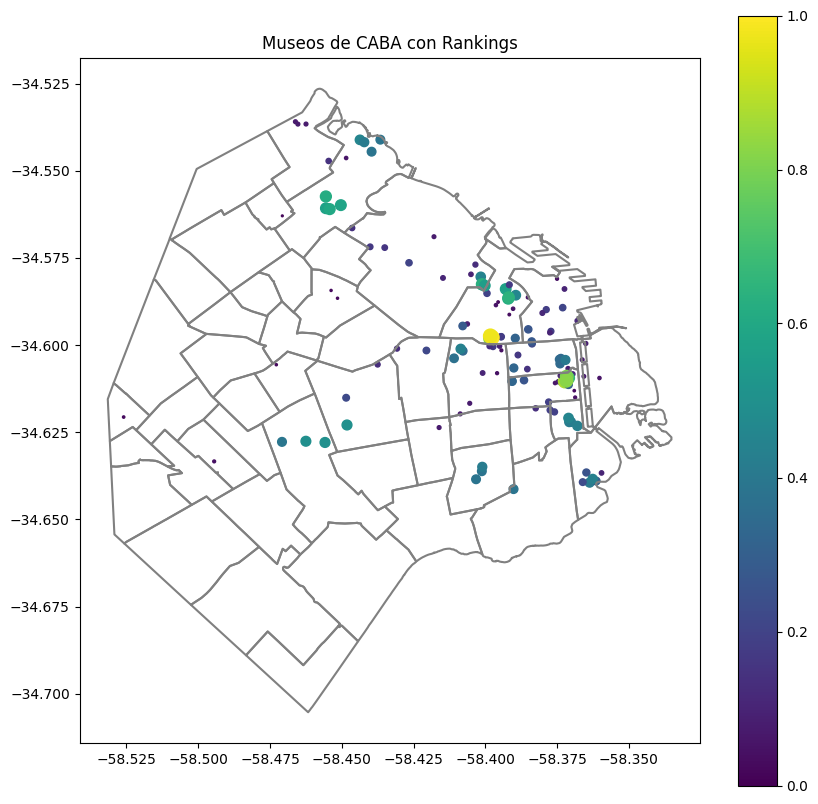

In [29]:



LU= calculaLU(M)
L = np.tril(LU,-1) + np.eye(M.shape[0])
U = np.triu(LU)
b = np.ones(M.shape[0])
# poner ranking entre 0 y 1
ranking_scores = resolver_LU(L, U, b)
def graph_rank_map(ranking_scores, barrios, museos):
  normalized_ranking_scores = (ranking_scores - ranking_scores.min()) / (ranking_scores.max() - ranking_scores.min())


  # graficar mapa
  fig, ax = plt.subplots(figsize=(10, 10))
  barrios.boundary.plot(color='gray', ax=ax)

  # graficar museos con label de ranking.
  museos.plot(ax=ax, column=normalized_ranking_scores, cmap='viridis', legend=True, markersize=normalized_ranking_scores*100)  # Adjust markersize for better visibility

  # Asociar cada museo con su ranking
  #for x, y, label in zip(museos.geometry.x, museos.geometry.y, normalized_ranking_scores):
  #    ax.annotate(f'{label:.2f}', xy=(x, y), xytext=(3, 3), textcoords="offset points", fontsize=8)

  plt.title("Museos de CABA con Rankings")
  plt.show()

graph_rank_map(ranking_scores, barrios, museos)

B. Construyendo la red conectando a cada museo con sus m vecinos m´as cercanos,
para m = 1, 3, 5, 10 y usando α = 1/5.

136


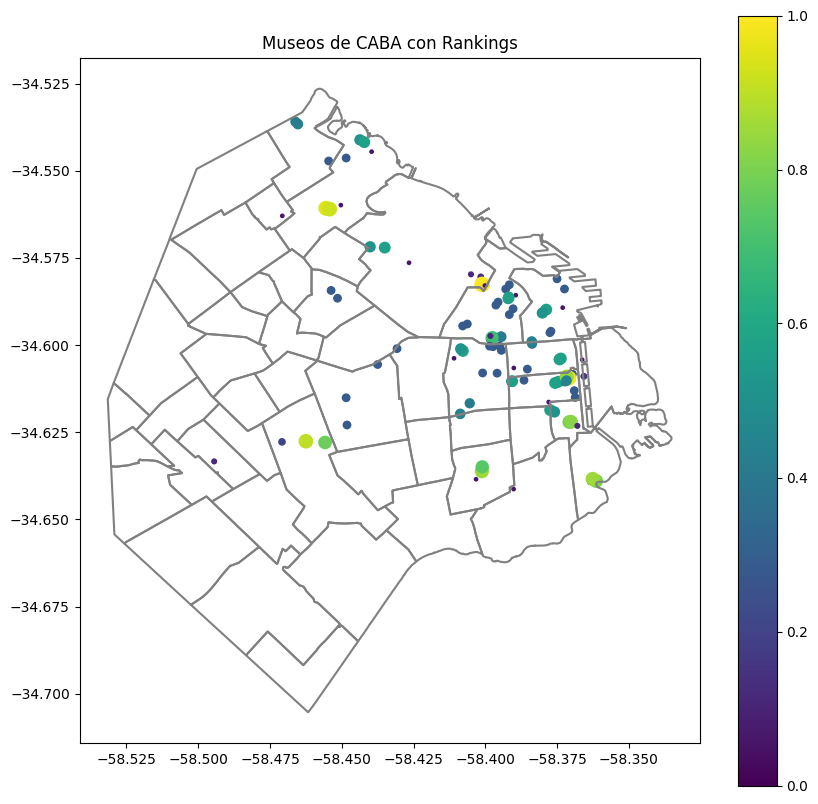

136


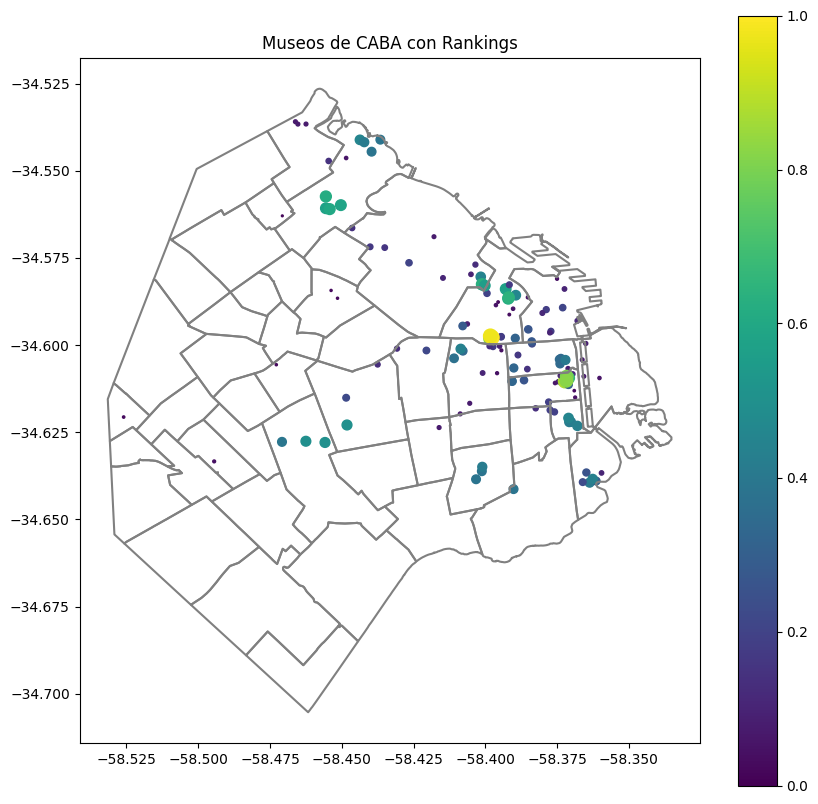

136


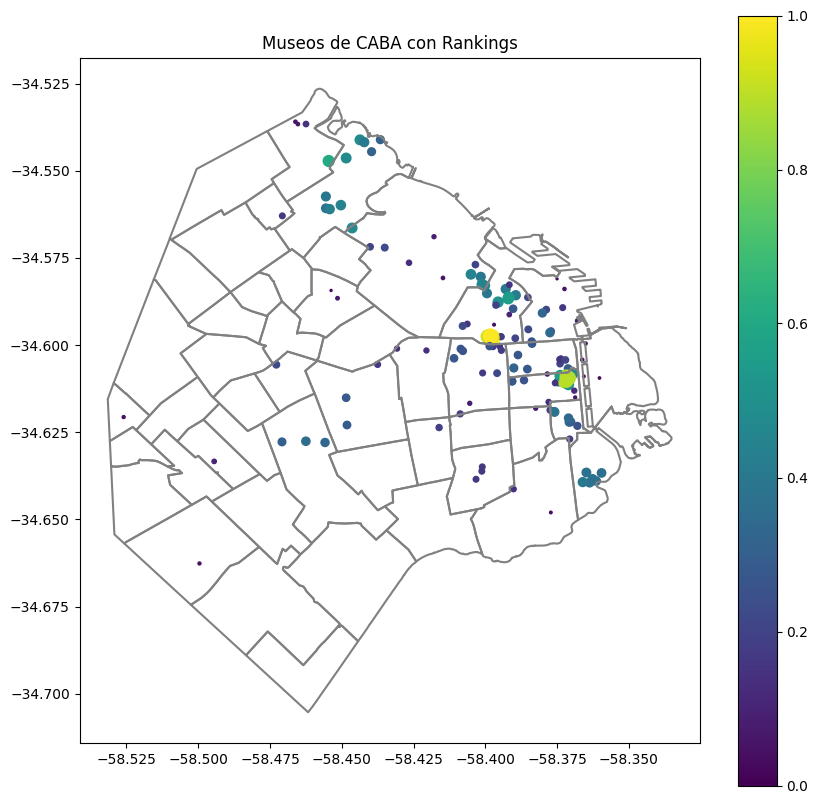

136


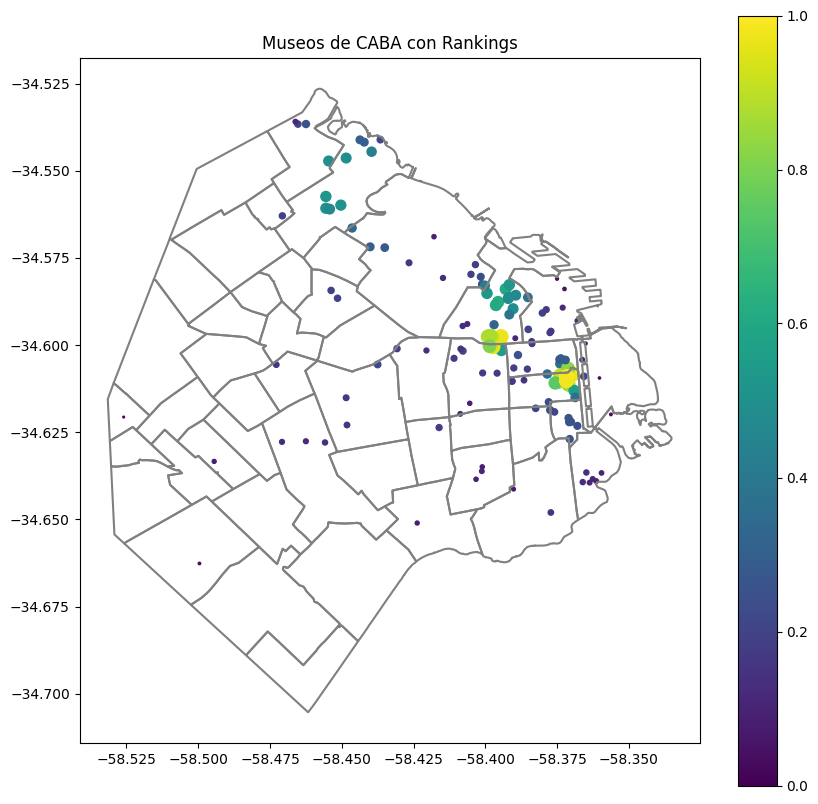

In [30]:
test_cases = np.array([(1, 0.2), (3, 0.2), (5, 0.2), (10, 0.2)])
M_cases = np.array([calcula_M(D, m, alpha) for m, alpha in test_cases])
for M in M_cases:
    LU= calculaLU(M)
    L = np.tril(LU,-1) + np.eye(M.shape[0])
    U = np.triu(LU)
    b = np.ones(M.shape[0])
    ranking_scores = resolver_LU(L, U, b)
    graph_rank_map(ranking_scores, barrios, museos)

C. para m = 5, considerando los valores de α = 6/7, 4/5, 2/3, 1/2, 1/3, 1/5, 1/7.

136


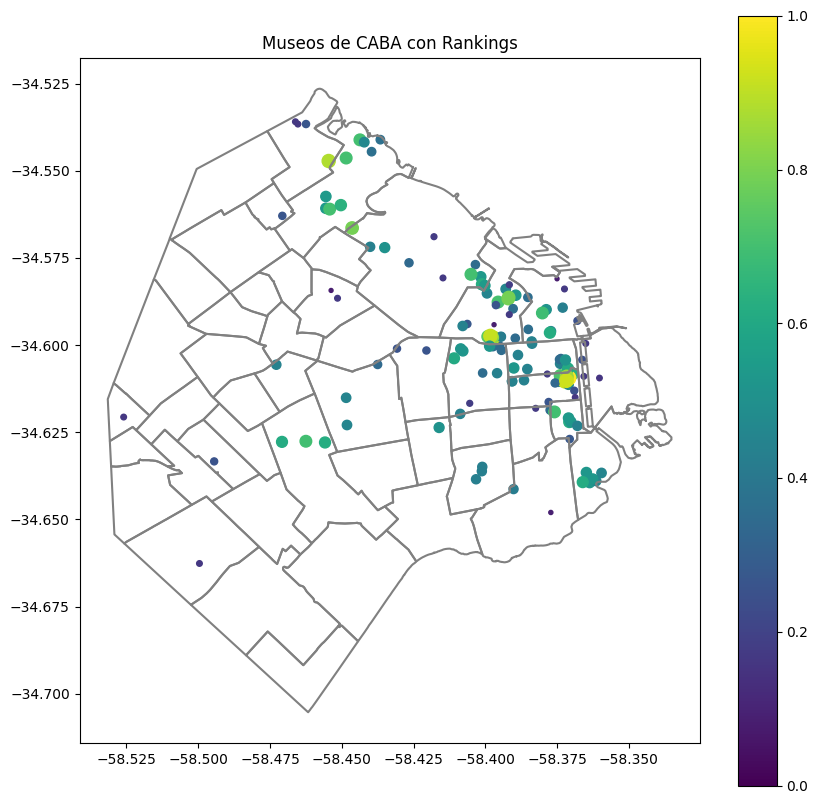

136


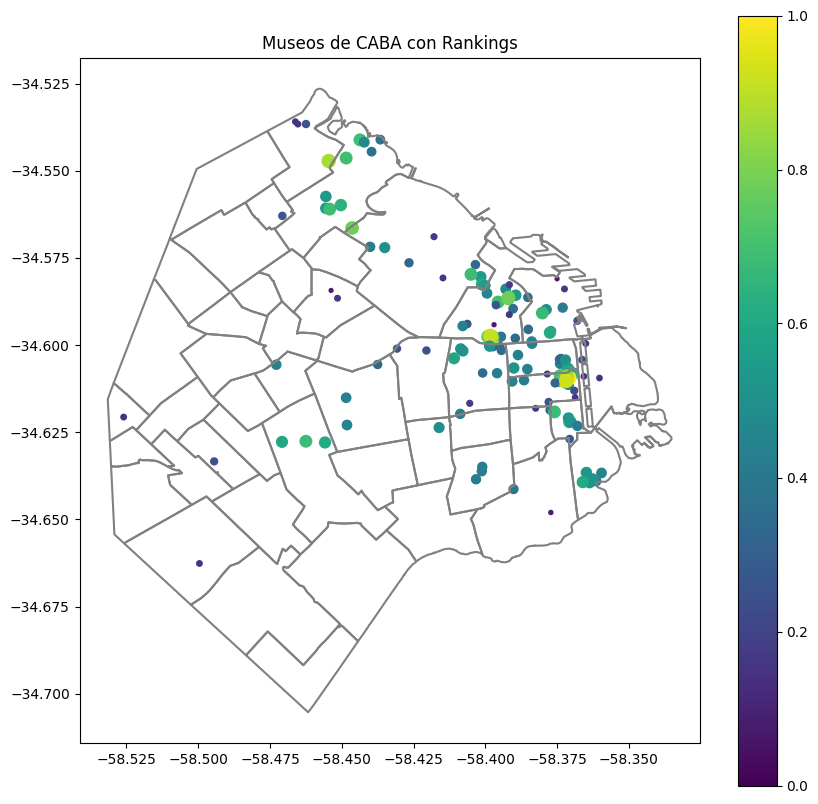

136


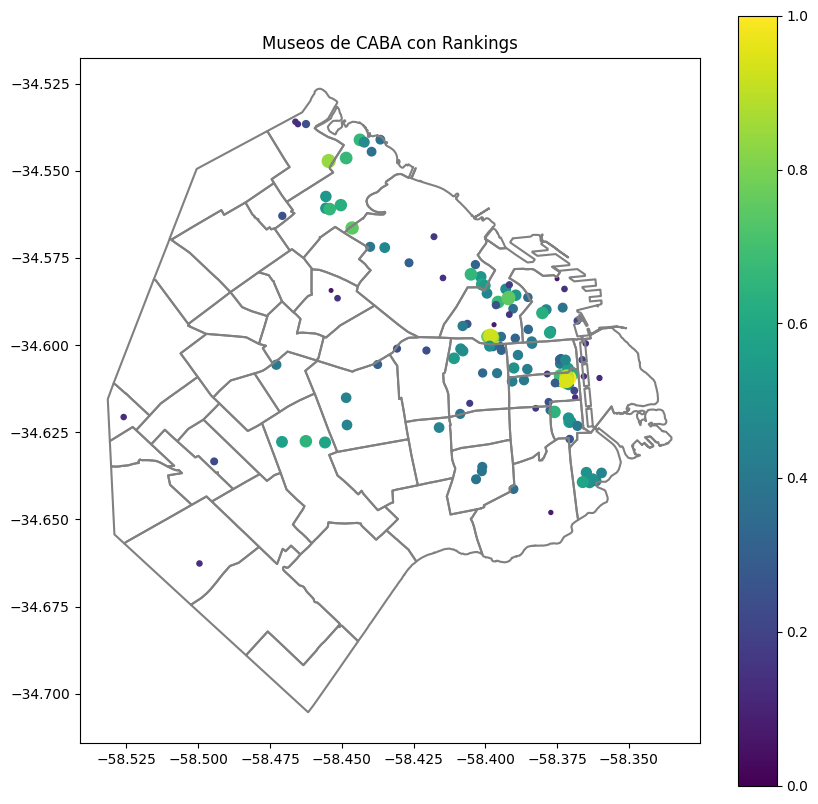

136


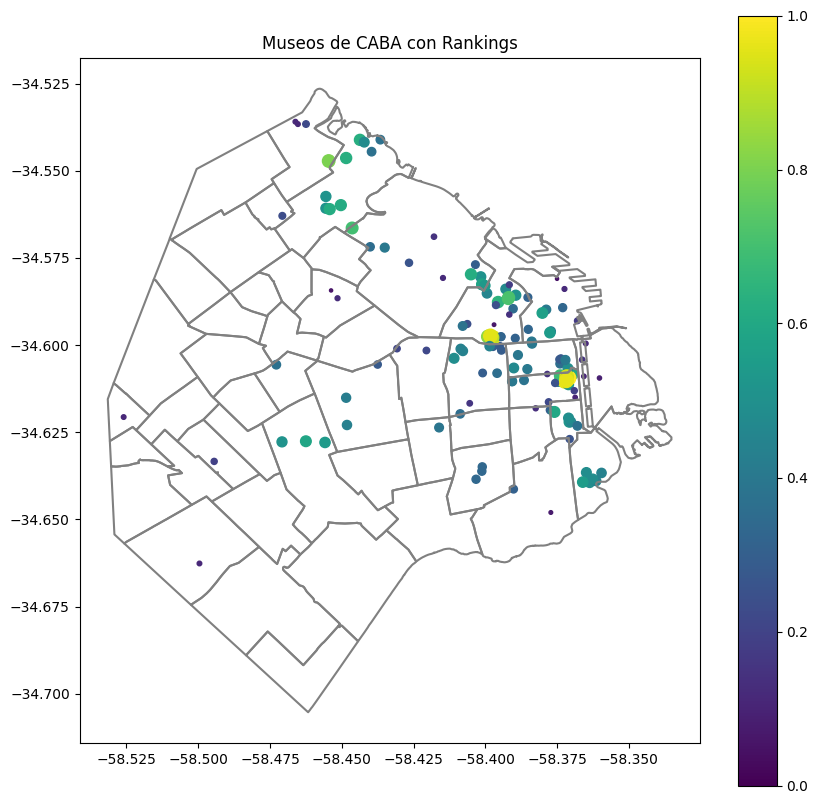

136


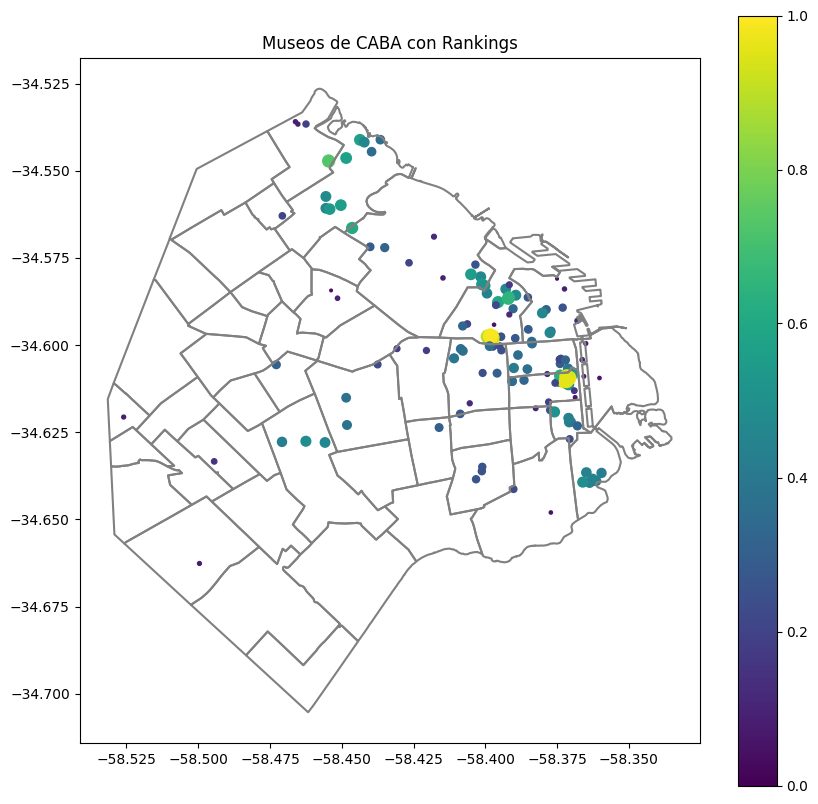

136


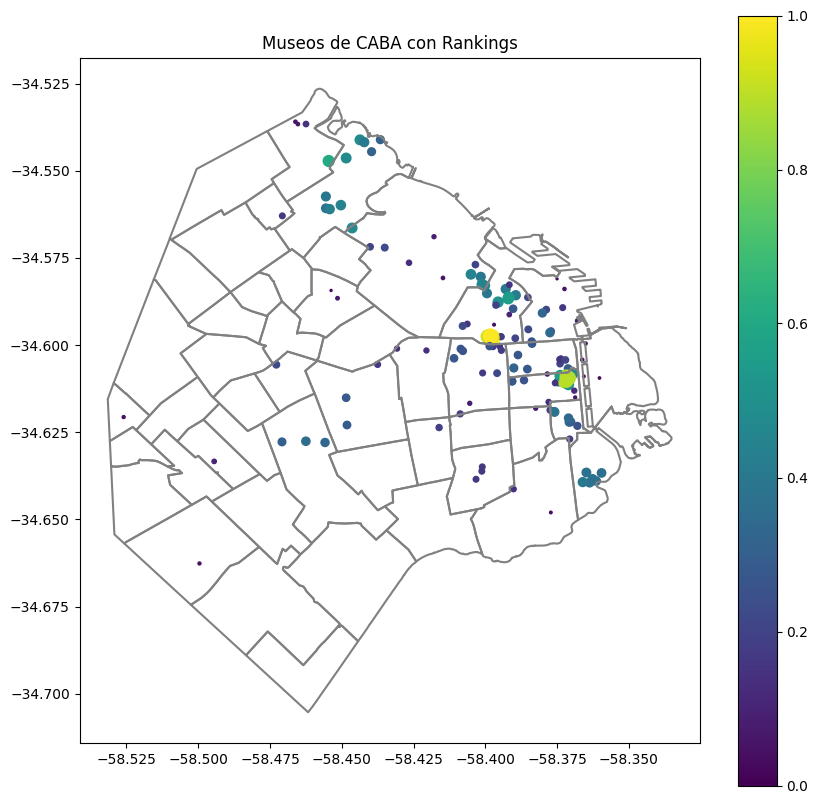

136


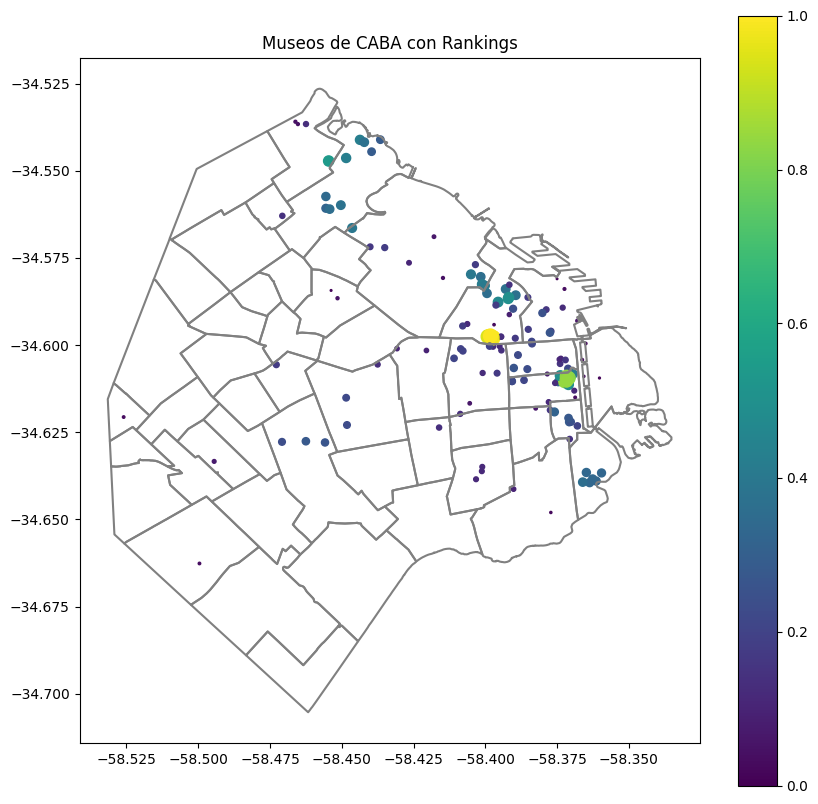

In [35]:
test_cases = np.array([
    (5, 6/7),
    (5, 4/5),
    (5, 2/3),
    (5, 1/2),
    (5, 1/3),
    (5, 1/5),
    (5, 1/7)
])
M_cases = np.array([calcula_M(D, m, alpha) for m, alpha in test_cases])
for M in M_cases:
    LU= calculaLU(M)
    L = np.tril(LU,-1) + np.eye(M.shape[0])
    U = np.triu(LU)
    b = np.ones(M.shape[0])
    ranking_scores = resolver_LU(L, U, b)
    graph_rank_map(ranking_scores, barrios, museos)

## Punto 4:

## Punto 5:

In [ ]:

from numpy.linalg import matrix_power
def calcula_matriz_continua (D):
    m=D.shape[0]#fila
    n=D.shape[1]
    C=np.zeros((m,n))
    for j in range (m):
        for i in range (n):
            if (j !=i):
               C[j,i]=1/D[j,i]
            else:
                C[j,i] = 0


    return C

J=np.array([[0,2],[2,0]])
#calcula_matriz_continua(J)
print(calcula_matriz_continua(J))


def calcula_B(C,r):
    #m=C.shape[0]#fila
    #n=C.shape[1]
    bklist=np.array()
    for i in range (r):#usarlo iterativo
        bk=linalg.matriz_power(C,i)
        bklist.apped(bk)

    return np.sum(bklist)

[[0.  0.5]
 [0.5 0. ]]



import linalg
from linalg import salve
def calcula_matriz_continua (D):
    m=D.shape[0]#fila
    n=D.shape[1]
    C=np.zeros((m,n))
    for j in range (m):
        for i in range (n):
            if (j !=i):
               C[j,i]=1/D[j,i]
            else:
                C[j,i] = 0


    return C

J=np.array([[0,2],[2,0]])
#calcula_matriz_continua(J)
print(calcula_matriz_continua(J))


def calcula_B(C,r):
    #m=C.shape[0]#fila
    #n=C.shape[1]
    bklist=np.array(m)
    for i in range (r):
        bk=linalg.salve(C,i)
        bklist.apped(bk)

    return np.sum(bklist)


print(  calcula_B(J,2))

## Punto 6:

# Extras

Para graficar la red con un conjunto de puntajes (como el Page Rank)

{0: Text(4924405.086723215, 6160838.106023658, ''),
 1: Text(4917216.80489522, 6166701.553530234, ''),
 2: Text(4924486.298584606, 6161409.256658559, ''),
 3: Text(4921922.052887296, 6164690.544542129, ''),
 4: Text(4920636.67547965, 6165640.199444978, ''),
 5: Text(4925338.320928778, 6162016.528710163, ''),
 6: Text(4922856.100832731, 6163868.567721188, ''),
 7: Text(4922641.894255253, 6162355.100129171, ''),
 8: Text(4917938.7521918025, 6168273.372961773, ''),
 9: Text(4924683.52693892, 6158996.617208998, ''),
 10: Text(4925725.9600755945, 6160896.846339954, ''),
 11: Text(4922075.10183836, 6164294.738410278, ''),
 12: Text(4926038.146946977, 6159721.190876993, ''),
 13: Text(4925200.592014585, 6161503.005610317, ''),
 14: Text(4925229.168803978, 6160973.145341254, ''),
 15: Text(4924875.410406244, 6161061.981187101, ''),
 16: Text(4924474.294424794, 6161547.549492302, ''),
 17: Text(4923553.755484842, 6163571.336254905, '17'),
 18: Text(4924615.955668659, 6160843.2491330765, ''),
 1

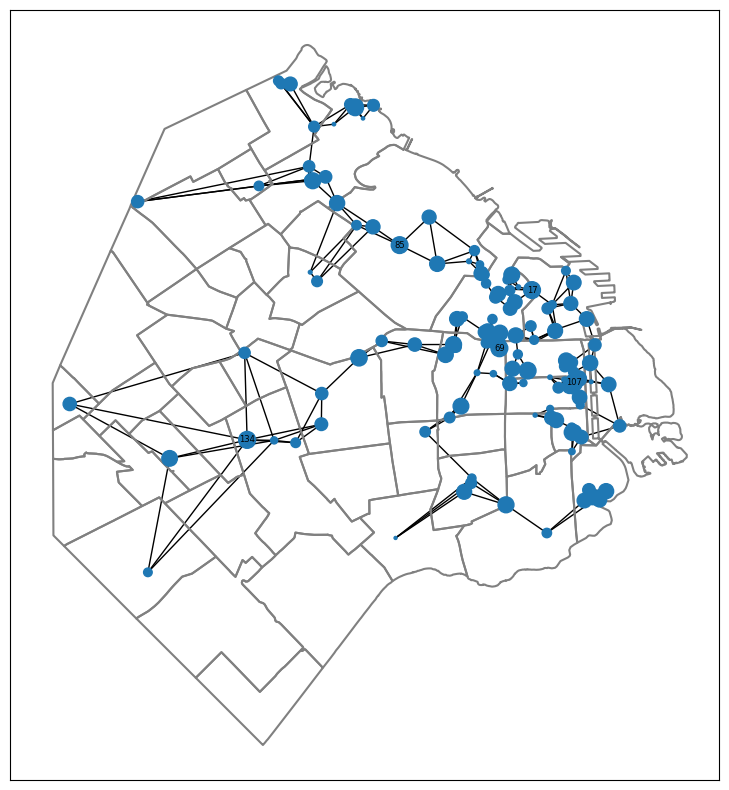

In [ ]:
factor_escala = 1e4 # Escalamos los nodos 10 mil veces para que sean bien visibles
fig, ax = plt.subplots(figsize=(10, 10)) # Visualización de la red en el mapa
barrios.to_crs("EPSG:22184").boundary.plot(color='gray',ax=ax) # Graficamos Los barrios
pr = np.random.uniform(0,1,museos.shape[0])# Este va a ser su score Page Rank. Ahora lo reemplazamos con un vector al azar
pr = pr/pr.sum() # Normalizamos para que sume 1
Nprincipales = 5 # Cantidad de principales
principales = np.argsort(pr)[-Nprincipales:] # Identificamos a los N principales
labels = {n: str(n) if i in principales else "" for i, n in enumerate(G.nodes)} # Nombres para esos nodos
nx.draw_networkx(G,G_layout,node_size = pr*factor_escala, ax=ax,with_labels=False) # Graficamos red
nx.draw_networkx_labels(G, G_layout, labels=labels, font_size=6, font_color="k") # Agregamos los nombres